# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../../traffic-signs-data/train.p"
testing_file = "../../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   39209 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Random images:


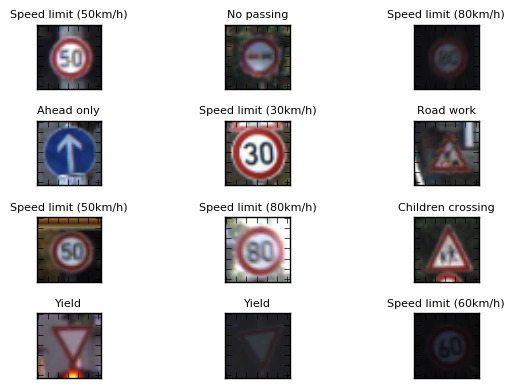

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import csv
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

# Read the label names from the csv file
def read_image_label_names(filename):
    with open(filename, newline='', encoding="utf8") as csvfile:
        filereader = csv.reader(csvfile)
        labels = [x[1] for x in filereader][1:]
        return labels

# Show a random sign with its label
def show_images(sample_size, images, labels, randomize = False):
    for sample_n in range(sample_size):
        if randomize:
            n = random.randint(0, len(images))
        else:
            n = sample_n
        ax = plt.subplot(np.ceil(sample_size/3),3,sample_n+1)
        ax.set_title(label_names[labels[n]], fontsize=8)
        ax.imshow(images[n])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.tight_layout()
    plt.show()

label_names = read_image_label_names('signnames.csv')
print("Random images:")
show_images(12, X_train, y_train, randomize = True)



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Before preprocessing: Showing means and images
82.665052346
82.1484603612


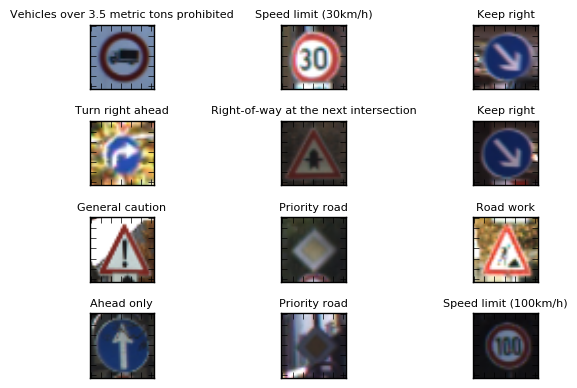

After preprocessing: Showing means and images


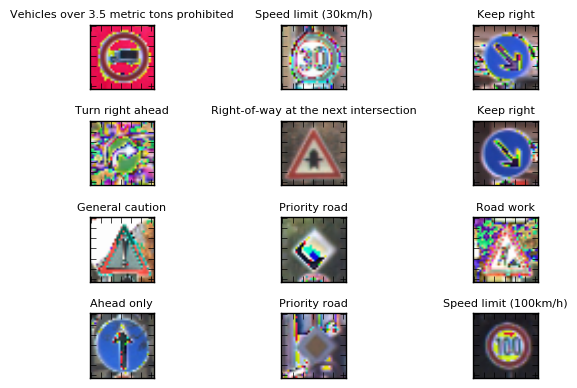

-0.354179278547
-0.358215153428


In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

normalize = True
def preprocess_image(img):
    if normalize:
        img = img.astype('float32')
        img = (img - [128])/128
    return img

print("Before preprocessing: Showing means and images")
print(np.mean(X_train))
print(np.mean(X_test))
show_images(12, X_test, y_test)

print("After preprocessing: Showing means and images")

X_train = np.array([preprocess_image(im) for im in X_train ])
X_test =  np.array([preprocess_image(im) for im in X_test ])

show_images(12, X_test, y_test)
print(np.mean(X_train))
print(np.mean(X_test))

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_



**Answer:**
I chose to normalize the pixel image data by subtracting 128 and dividing by 128 pixels. Normalizing the image data does not change the content of the image but centers the image around its mean, making it easier on the optimizer to proceed numerically. There are good mathematical reasons to ensure that the values we compute be roughly around mean of zero and equal variance when doing optimization. The resulting dataset mean wasn't exactly zero, but it was reduced from around 82 to roughly -0.35. I chose this technique because it was one of the recommeded technique for solving a well conditioned problem (refer : Lesson 23 of Introduction to Tensorflow lecture in the Self driving car nano degree program).

Show images before augmenting the images


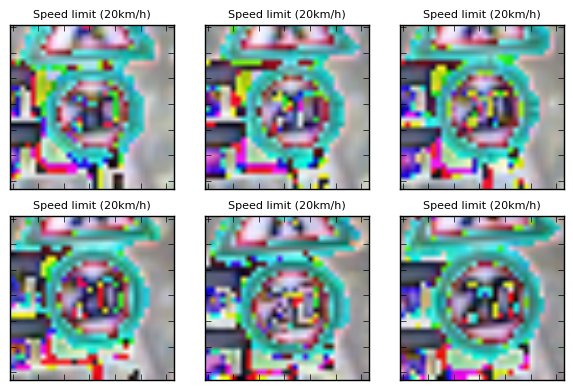

Show images after the augmenting the images by rotating them randomly between -11 and +11 degrees and then scaling them up


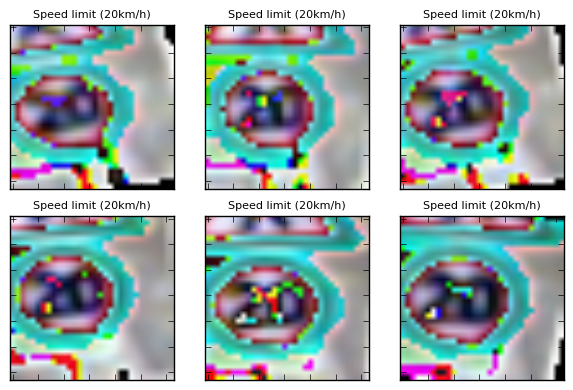

Augment the training set by 39209 additional sample images 
Training size: 78418  labels size: 78418
Test size: 10104  labels size: 10104
Validation size: 2526  labels size: 2526


In [5]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
import cv2

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#Augment the image by rotating each image by a random amount between -11 and +11 degrees and then scaling by a random amount between 101% and 105%
def augment(img):
    random.seed()
    rows,cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),random.uniform(-11.0, 11.0),1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    dst = cv2.resize(dst,None,fx=random.uniform(1.3, 1.4), fy=random.uniform(1.01,1.03), interpolation = cv2.INTER_LINEAR)
    dx  = np.shape(dst)[0] - 32
    dy  = np.shape(dst)[1] - 32
    return dst[dx:dx+32, dy:dy+32]
  
print("Show images before augmenting the images")
show_images(6, X_train, y_train, randomize = False)

#Augment the images from the training data
augmented = np.array([augment(img) for img in X_train])

print("Show images after the augmenting the images by rotating them randomly between -11 and +11 degrees and then scaling them up")
show_images(6, augmented, y_train, randomize = False)

print("Augment the training set by %s additional sample images " % len(augmented))
X_train = np.concatenate((X_train, augmented))
y_train = np.concatenate((y_train, [x for x in y_train]))

n_train = len(X_train)

# Delete to free up some memory
del augmented

#Shuffle the training data.
X_train, y_train = shuffle(X_train, y_train)

# Separate 20% of the test set for validation
# This cell should not be run twice independently before running the previous cell
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.2)
print("Training size:", len(X_train), " labels size:", len(y_train) )
print("Test size:", len(X_test), " labels size:", len(y_test) )
print("Validation size:", len(X_validation), " labels size:", len(y_validation) )

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I used the SciKit Learn train_test_split function to create a validation set out of the test set. I used 20% of the testing set to create the validation set.

The data augmentation is critical to increase the accuracy of the model. I decided to generate extra data by using OpenCV's methods rather than using methods provided by Tensorflow, which I was not able to get a good result from.I rotated each image by a random amount between -11 and +11 degrees and then scaled up by a random amount between 101% and 105%. I able able to duplicate the dataset with additional samples based on the original ones. The training data is unbalanced therefore I could have optimized this further and generated more samples for the less common ones but the augmentation I did, so far, has been sufficient to increase the validation accuracy.

In [6]:
# Load tensorflow and define some training parameters
import tensorflow as tf

#How many times to run the model on our training data through the network. The higher this value the better the accuracy but it impacts the training speed
EPOCHS = 60

#How many images to run at a time in tensorflow during training. The larger the batch size the faster the model can train but the processory may have a memory limit larger the batch size
BATCH_SIZE = 100

In [7]:
from tensorflow.contrib.layers import flatten

def LeNet_2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    n_classes = 43
    
    # Store layers weight & bias
    weights = {
        'wc1': tf.Variable(tf.truncated_normal((5, 5, 3, 6), mean = mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal((5, 5, 6, 16), mean = mu, stddev = sigma)),
        'wc3': tf.Variable(tf.truncated_normal((5, 5, 16, 400), mean = mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal((800, n_classes), mean = mu, stddev = sigma))}

    biases = {
        'bc1': tf.Variable(tf.zeros((6))),
        'bc2': tf.Variable(tf.zeros((16))),
        'bc3': tf.Variable(tf.zeros((400))),
        'out': tf.Variable(tf.zeros((n_classes)))}
    
    def conv2d(x, W, b, strides=1):
        #Computes a 2-D convolution given 4-D input and filter tensors.
        x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
        x = tf.nn.bias_add(x, b)
        # Introduces nonlinearities in neural networks that is continuous but not differentiable everywhere
        return tf.nn.relu(x)

    def maxpool2d(x, k=2):
        return tf.nn.max_pool(
            x,
            ksize=[1, k, k, 1],
            strides=[1, k, k, 1],
            padding='VALID')

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # Layer 1: Activation.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])

    # Pooling 1: Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, k=2)

    # Layer 2: Convolutional. Output = 10x10x16.
    # Layer 2: Activation.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])

    # Pooling 2: Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2, k=2)

    # Layer 3: Convolutional. Input = 10x10x16. Output = 1x1x400.
    # Layer 3: Activation.
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    
    # Flatten: Input = 5x5x16. Output = 400.
    flat_conv2   = flatten(conv2)
    # Flatten: Input = 1x1x400. Output = 400.
    flat_conv3   = flatten(conv3)
    
    # Concat the flattened outputs from Layers 2 and 4. Input = 400 + 400. Output = 800
    concat_flat_conv2And3 = tf.concat_v2([flat_conv3, flat_conv2], 1)
    
    # Dropout - random regularization 
    dropout_conv = tf.nn.dropout(concat_flat_conv2And3, keep_prob)

    # Layer 3: Fully Connected. Input = 800. Output = 120.
    logits = tf.matmul(dropout_conv, weights['out']) + biases['out']
    return logits

In [8]:
tf.reset_default_graph()
# Inserts a placeholder for a tensor that will be always fed.
# x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
# probability to keep units
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, 43)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The LeNet architecture was a good starting point especially because it was a easy plug and play. However,I tried to emulate the architecture described in the traffic sign classifier paper referenced earlier. My final architecture essentially is a 2-stage ConvNet architecture. The input is processed in a feedforward manner through two stage of convolutions and pooling, and finally classified with a linear classifier. The output of the 1st stage is also fed directly to the classifier as higher-resolution features.The layers are set up like this:
#### 5x5 convolution (32x32x3 in, 28x28x6 out)
#### Non linearity via ReLU 
#### 2x2 max pool (28x28x6 in, 14x14x6 out)
#### 5x5 convolution (14x14x6 in, 10x10x16 out)
#### Non linearity via ReLU 
#### 2x2 max pool (10x10x16 in, 5x5x16 out)
#### 5x5 convolution (5x5x6 in, 1x1x400 out)
#### ReLu
#### Flatten layers from numbers 8 (1x1x400 -> 400) and 6 (5x5x16 -> 400)
#### Concatenate flattened layers to a single size-800 layer
#### Dropout layer
#### Fully connected layer (800 in, 43 out)

In [9]:
### Create a training pipeline
# learning rate
rate = 0.0005
logits = LeNet_2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [10]:
# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

#Evaluate how well the loss and accuracy of the model for a given dataset.
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [11]:
# Run the training data through the training pipeline to train the model.
# After each epoch, measure the loss and accuracy of the validation set.
# Save the model after training.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.795

EPOCH 2 ...
Validation Accuracy = 0.865

EPOCH 3 ...
Validation Accuracy = 0.890

EPOCH 4 ...
Validation Accuracy = 0.908

EPOCH 5 ...
Validation Accuracy = 0.909

EPOCH 6 ...
Validation Accuracy = 0.920

EPOCH 7 ...
Validation Accuracy = 0.915

EPOCH 8 ...
Validation Accuracy = 0.928

EPOCH 9 ...
Validation Accuracy = 0.921

EPOCH 10 ...
Validation Accuracy = 0.926

EPOCH 11 ...
Validation Accuracy = 0.929

EPOCH 12 ...
Validation Accuracy = 0.936

EPOCH 13 ...
Validation Accuracy = 0.931

EPOCH 14 ...
Validation Accuracy = 0.931

EPOCH 15 ...
Validation Accuracy = 0.935

EPOCH 16 ...
Validation Accuracy = 0.935

EPOCH 17 ...
Validation Accuracy = 0.930

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.940

EPOCH 20 ...
Validation Accuracy = 0.938

EPOCH 21 ...
Validation Accuracy = 0.940

EPOCH 22 ...
Validation Accuracy = 0.945

EPOCH 23 ...
Validation Accuracy = 0.943

EPOCH 24 ...
Validation Accura

In [12]:
# Finally, we can evaluate the accuracy of the model on the test dataset

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.947


In [57]:
#*******************************************************************************************************************     
#                                      Test Accuracy = 0.947
#******************************************************************************************************************* 


In [58]:
#Training Attempts 

#I
#Epoch : 20
#Batch size : 100
#rate : 0.009
#mu: 0
#sigma: 0.1
#dropout keep probability: 0.5
#Test Set Accuracy = 0.947

#II - Increased Epoch size, Result - Did not see much bump in the accuracy by increasing the epoch size
#Epoch : 60
#Batch size : 100
#rate : 0.005
#mu: 0
#sigma: 0.1
#dropout keep probability: 0.5
#Test Set Accuracy = 0.947  

#III


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the Adam optimizer, with batch size=100 for 60 epochs to train my model. The dropout probability is of 0.2 for the convolutional layers, and 0.5 for the rest of the layers. The regularization coefficient is 0.01. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I started with pre-defined architectures (LeNet and the Sermanet/LeCun model) and almost all of the tweaking from there was a process of trial and error. The guesses were educated based on already well known implementations.I tweaked the epoch and learning rate in 2 different training attempts and did not see an increase in test accuracy which tells me that the learning stopped at earlier epoch value itself.Somewhere between 10 and 20 epochs is the sweet spot for having a network that generalizes.I suspect that if I had used a deeper convolutional network it would have been more efficient than increasing filter sizes or the number of filters though I did not get time to validate this theory. Here is the log of my parameter tweakings and various training attempts

## Training Attempts 

### I - First training attempt with Epoch size = 20, rate = 0.009 , Result - Test accuracy = 0.947
###### Epoch : 20
###### Batch size : 100
###### rate : 0.009
###### mu: 0
###### sigma: 0.1
###### dropout keep probability: 0.5
## Test Set Accuracy = 0.947

### II - Increased Epoch size = 60, Reduced rate = 0.005, Result - Did not see much bump in the accuracy by increasing the epoch size
###### Epoch : 60
###### Batch size : 100
###### rate : 0.005
###### mu: 0
###### sigma: 0.1
###### dropout keep probability: 0.5
## Test Set Accuracy = 0.947  

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(8, 32, 32, 3)


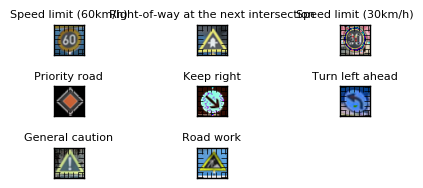

In [47]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,4, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('./image_data_internet/*.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(image)
    my_images.append(image)

my_images = np.asarray(my_images)
my_images = my_images.astype('float32')
my_images_normalized = (my_images - 128)/128 
my_labels = [3, 11, 1, 12, 38, 34, 18, 25]
print(my_images_normalized.shape)
show_images(8, my_images, my_labels, randomize = False)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I chose 8 test images as seen above and I chose some of my images intentionally difficult to solve, because I wanted to see how much the results would extend to more general data. The samples aren't German traffic signs, so while they're similar, they have slightly different shapes. For ex. the left sign image is slightly tilted.

In [43]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

#my_labels = [0, 1, 0, 17, 38, 39, 28, 14]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(my_images_normalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 0.750


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
My model accuracy was 75% on identifying captured images compared to testing on the dataset. So out of 8 images, 6 were identified correctly and 2 were incorrectly classified. The 2 images incorrectly classified were the priority road sign and the tilted turn left sign images. I suspect if I had done some pre-processing by using grayscale images as my training/test data that may have increased the accuracy. Augmenting the training data by adding random rotations and zooming seems to have had a big effect on the flexibilty in the network though. The accuracy varies quite a bit each time data is generated when training the same network, I assume this is because of the way I'm augmenting the training samples

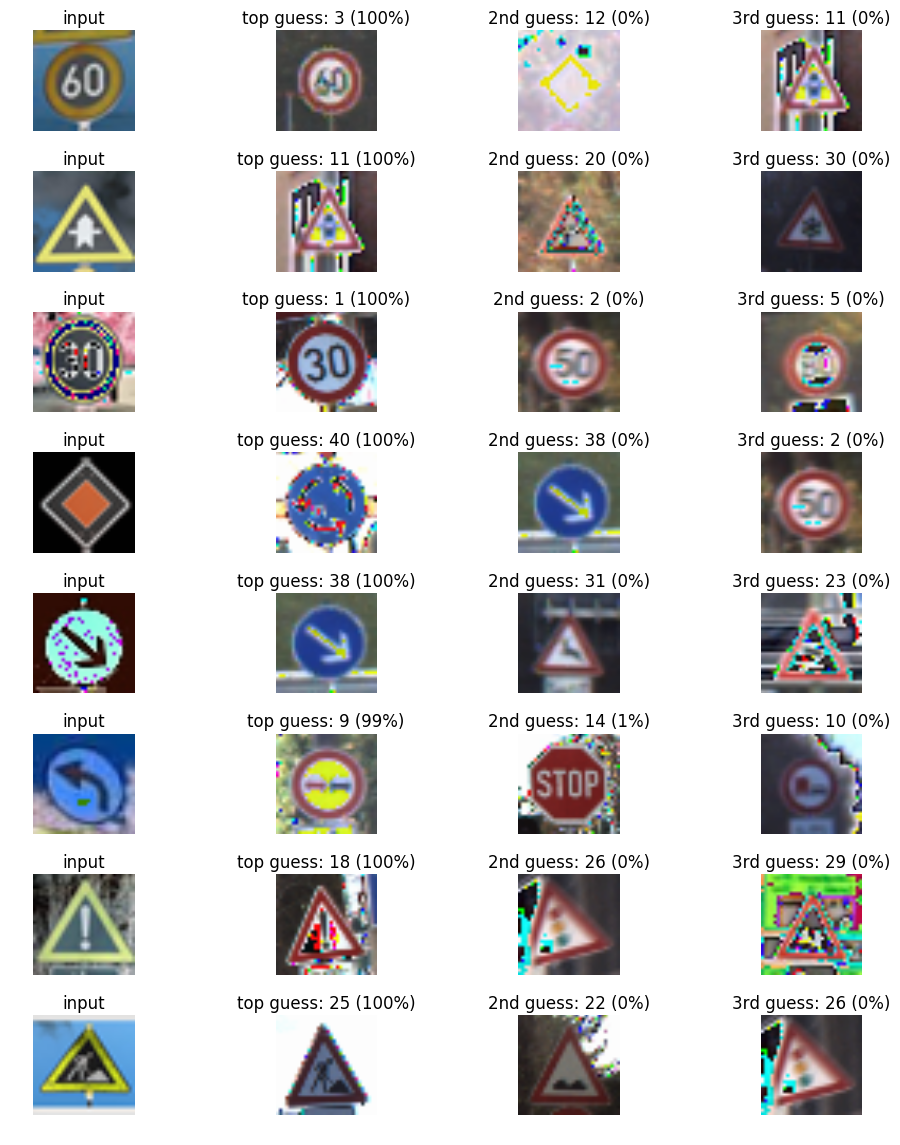

In [53]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[4*i].axis('off')
        axs[4*i].imshow(image)
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_validation == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_validation[index1].squeeze())
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_validation == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_validation[index2].squeeze())
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_validation == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_validation[index3].squeeze())
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

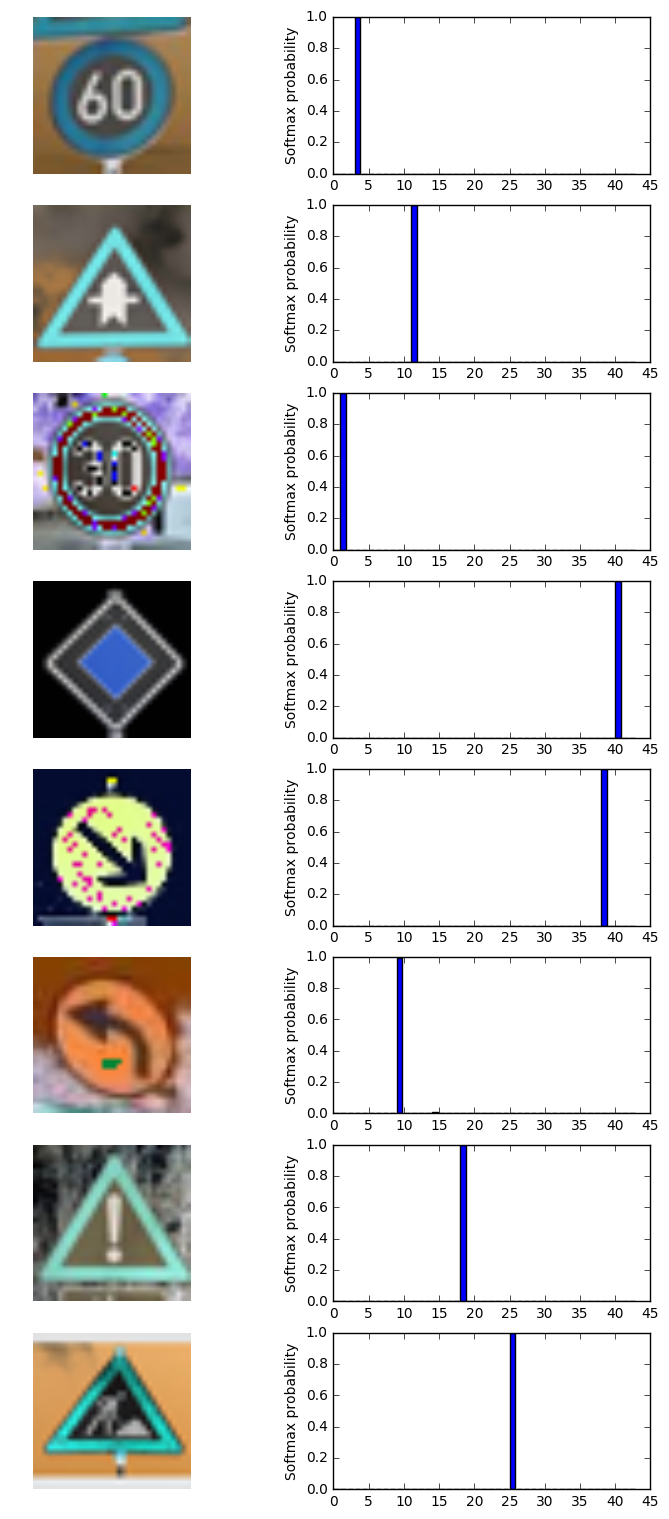

In [59]:
fig, axs = plt.subplots(8,2, figsize=(9, 19))
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(cv2.cvtColor(my_images[i//2], cv2.COLOR_BGR2RGB))
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')

**Answer:**
Most predictions are surprisingly confident, with probabilities very close to 100%, but I can also notice sometimes the network is very confident when classifying images with the wrong label (ex. priority road sign).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.